# TITLE - AMAZON SALES DATASET


## About the Dataset
Online retailer, producer of e-readers, and provider of Web services Amazon has emerged as the paradigm of modern e-commerce. Seattle, Washington, serves as its corporate headquarters.This dataset provides information on the numerous clothing categories that the website sold throughout the relevant time period. Additionally, it gives information on the type, size, quantity purchased, status, channel, service, state, and cities. We will analyze the dataset in order to predict the variables influencing the amount of the category's purchases, the services and channels selected, and the states of delivery and status.

# Briefs on the Analysis
Our analysis's goal is to identify the variables that influence the quantity of sales of various types of clothing, including consumer preferences for various levels of service and distribution channels and states with strong demand. This will assist Amazon in choosing a specific customer service model, product manufacturer, and channel of distribution. Few columns and rows that are not necessary for us to achieve our goal will be dropped in favor of imputing the values of crucial columns and rows. Additionally, as non-numerical data cannot be extrapolated or used for analysis, we have encoded and normalized the data values to facilitate analysis.



# Objectives

1. To clean the dataset since it needs to be cleaned before analysis because it contains missing, invalid, and inconsistent values. Transforming data to improve the usability of the dataset, for as by changing categorical categories into numerical ones.
2. To lower the dataset's size; the dataset is too big to analyze as is, so a subset of the data may need to be used instead.
3. To choose features that are relevant to the problem being solved because some features in the dataset may need to be deleted.
4. The goal is to separate training and test data in order to properly evaluate models, avoid overfitting, adjust hyperparameters, and choose the optimal model for the task at hand.
5. Random Forest is used due to its high accuracy, reduced overfitting via averaging multiple decision trees, and robustness to outliers
6. XGBoost is utilized for efficient gradient boosting, delivering high predictive performance and handling complex relationships in data through optimized boosting algorithms.
7. Hyperparameter tuning is used to optimize a model's performance by systematically adjusting settings to enhance predictive accuracy and prevent overfitting, resulting in better generalization to new data.
8. To assess the max depth that can be used while making a decision tree so that accuracy can be maintained.
9. To analysing the accuracy of test dataframe.
10. To summarizing the performance of a Decision Tree Classifier (DTC) model's predictions on the training data. It offers insights into the model's precision, recall, F1-score, and support for each class.
11. To display a confusion matrix, which shows the count of true positive, true negative, false positive, and false negative predictions for a Decision Tree Classifier model on the test data.
12. To train the model on the training data, predicts outcomes on the test data, and computes the coefficient of determination (R² score) to assess the model's performance in explaining the variance of the target variable.
13. The goal  is to use a bar plot to visually represent the distribution of orders for various apparel sizes. The story sheds light on the acceptance or demand of different garment sizes.
14. The top 10 cities with the most demand
15. The top 10 states with the most demand.
16. The most demanded clothing item



In [ ]:
'/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv'

'/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv'

In [78]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from pathlib import Path
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import seaborn as sns # For Data Visualization
from sklearn import metrics #for checking accuracy
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Display from a cell outputs of multiple commands:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [79]:
#  Get data from gdrive:

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [80]:
# Path to data folder:

pathToFolder = "/gdrive/MyDrive/BDDA"

In [83]:
# path + Filename:

path = Path(pathToFolder) / "Amazon Sale Report .csv"
path

PosixPath('/gdrive/MyDrive/BDDA/Amazon Sale Report .csv')

In [84]:
#Load data:

df = pd.read_csv(path)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,State
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,MH
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,KA
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,MH
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,PY
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,TN


In [85]:
#making a copy of data
df_copy = df.copy()

In [86]:
#converting space and none to np.nan
df.replace(to_replace=[None], value=np.nan, inplace=True)
df.replace(to_replace='isnull', value=np.nan, inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [87]:
#knowing the dataset shape
df.shape

(128975, 25)

In [ ]:
#calculating the null values of columns
df_missingvalues_columns = df.isna().sum(axis = 0).sort_values(ascending = False)
df_missingvalues_columns

fulfilled-by     89724
promotion-ids    49179
Unnamed: 22      49076
currency          7821
Amount            7821
dtype: int64

In [ ]:
#calculating the percentage of null values
df_missingpercent = df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100
df_missingpercent.head()
# fullfilled-by column has the highest number of nan values followed by promotion-ids column

fulfilled-by     69.552949
promotion-ids    38.122960
Unnamed: 22      38.043116
currency          6.062744
Amount            6.062744
dtype: float64

In [ ]:
#drop of columns having missing values more that 66 percent
df.drop('fulfilled-by', axis=1, inplace=True)

In [ ]:
# dropping row having qty = 0, as the data will be irrelevant to us and might impact our analysis
df = df[df['Qty'] != 0]

In [ ]:
#dropping the columns
df.drop(['index', 'Order ID','ASIN','ship-postal-code','promotion-ids','Unnamed: 22','ship-country','currency'], axis= 1 , inplace = True)

- Columns to drop
- Index , order Id, ASIN - not suitable for analysis
- Unnamed: 22 - undeterminable data
- fulfilled-by - only value was amazon courier "easy-ship" with no other relationship
- ship-country - The shipping Country is India
- currency - the currency is Indian Rupee (INR)ship- postal code - not required for analysis
- promotion-ids - not relevant for analysis

In [ ]:
#knowing the left columns
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'Courier Status', 'Qty', 'Amount',
       'ship-city', 'ship-state', 'B2B'],
      dtype='object')

In [ ]:
#calculating the null values after dropping
df.isna().sum(axis = 0).sort_values(ascending = False).head()
df_missingpercentage = df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100
df_missingpercentage.head()
# 3 columns have mssing values with highest missing value being 0.02% percent

Amount        150
ship-city      54
Date           26
Status         26
Fulfilment     26
dtype: int64

Amount        0.129094
ship-city     0.046474
Date          0.022376
Status        0.022376
Fulfilment    0.022376
dtype: float64

In [ ]:
#data left after processing
len(df)/len(df_copy)*100

90.07216998317843

In [ ]:
#knowing the unique values in each column for processing
df_unique = df.nunique().to_frame(name='Count of unique values')
df_unique

,Count of unique values
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1372
SKU,7142
Category,9
Size,11
Courier Status,2


In [ ]:
df["Date"]=pd.to_datetime(df["Date"]) #converting Date dtype into datetime
# Find the minimum and maximum time period
min_time_period = df['Date'].min()
max_time_period = df['Date'].max()
# Create a new DataFrame with the time period range
time_period_range_df = pd.DataFrame({'Start Time': [min_time_period], 'End Time': [max_time_period]})

print(time_period_range_df)
#the Data has a time_period from 31 MAR 2022- 29 JUN 2022

  Start Time   End Time
0 2022-03-31 2022-06-29


In [ ]:
# Record-wise Missing Data Information (Top 5)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data

129000    15
128987    15
128975    15
128976    15
128977    15
dtype: int64

In [ ]:
#bifurcating in categorical and non categorical data
df_cat = df[['Status','Fulfilment','Sales Channel ','ship-service-level','Style', 'Category', 'Size','Courier Status','Qty','ship-city','ship-state','B2B']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['Amount']]

In [ ]:
#analysing the dataset dtype and count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116194 entries, 1 to 129000
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                116168 non-null  datetime64[ns]
 1   Status              116168 non-null  object        
 2   Fulfilment          116168 non-null  object        
 3   Sales Channel       116168 non-null  object        
 4   ship-service-level  116168 non-null  object        
 5   Style               116168 non-null  object        
 6   SKU                 116168 non-null  object        
 7   Category            116168 non-null  object        
 8   Size                116168 non-null  object        
 9   Courier Status      116168 non-null  object        
 10  Qty                 116168 non-null  float64       
 11  Amount              116044 non-null  float64       
 12  ship-city           116140 non-null  object        
 13  ship-state          116168 no

In [ ]:
#imputing the categorical values using mode
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns)# Missing Categorical Data Imputed Subset
df_cat_mdi.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1.0,BENGALURU,KARNATAKA,False
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1.0,NAVI MUMBAI,MAHARASHTRA,True
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1.0,CHENNAI,TAMIL NADU,False
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1.0,GHAZIABAD,UTTAR PRADESH,False
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1.0,CHANDIGARH,CHANDIGARH,False


In [ ]:
#imputing the noncatgeorical column null values using mean of the colum# Missing Non-Categorical Data Imputed Subset using Simple Imputer
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns)
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116194 entries, 0 to 116193
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  116194 non-null  float64
dtypes: float64(1)
memory usage: 907.9 KB


In [ ]:
df_cat_mdi_code = df_cat_mdi.copy()

In [ ]:
# encoding the categorical columns
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdi_code)
df_cat_code_oe = pd.DataFrame(oe_fit,columns=['Status_code', 'Fulfilment_code','Sales Channel_code ', 'ship-service-level_code','Style_code',
       'Category_code', 'Size_code', 'Courier Status_code', 'Qty_code', 'ship-city_code','ship-state_code', 'B2B_code'])
df_cat_mdt_code_oe = df_cat_mdi_code.join(df_cat_code_oe)

In [ ]:
# Normalization : Min-Max Scaling - formula - x_new = (x - min) / (max - min)
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdi_si[['Amount']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['Amount_mmnorm']);
df_noncat_mdt_mmn = df_noncat_mdi_si.join(df_noncat_minmax_norm); df_noncat_mdt_mmn.head()

,Amount,Amount_mmnorm
0,406.0,0.072708
1,329.0,0.058918
2,574.0,0.102794
3,824.0,0.147564
4,653.0,0.116941


In [ ]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy()

In [ ]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy();

In [ ]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd)

In [ ]:
df_ppd.columns

Index(['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style',
       'Category', 'Size', 'Courier Status', 'Qty', 'ship-city', 'ship-state',
       'B2B', 'Status_code', 'Fulfilment_code', 'Sales Channel_code ',
       'ship-service-level_code', 'Style_code', 'Category_code', 'Size_code',
       'Courier Status_code', 'Qty_code', 'ship-city_code', 'ship-state_code',
       'B2B_code', 'Amount', 'Amount_mmnorm'],
      dtype='object')

In [ ]:
df_ppd.head()

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,...,Style_code,Category_code,Size_code,Courier Status_code,Qty_code,ship-city_code,ship-state_code,B2B_code,Amount,Amount_mmnorm
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1.0,BENGALURU,...,846.0,8.0,0.0,0.0,0.0,734.0,17.0,0.0,406.0,0.072708
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1.0,NAVI MUMBAI,...,532.0,8.0,8.0,0.0,0.0,5076.0,22.0,1.0,329.0,0.058918
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1.0,CHENNAI,...,753.0,6.0,0.0,0.0,0.0,1385.0,36.0,0.0,574.0,0.102794
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1.0,GHAZIABAD,...,1231.0,5.0,8.0,0.0,0.0,2368.0,39.0,0.0,824.0,0.147564
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1.0,CHANDIGARH,...,180.0,5.0,5.0,0.0,0.0,1334.0,5.0,0.0,653.0,0.116941


In [ ]:
#knowing the popular sizes
df_size_popular=df.Size.value_counts()
df_size_popular

M       20364
L       19924
XL      18860
XXL     16431
S       15277
3XL     13475
XS       9901
6XL       687
5XL       512
4XL       396
Free      341
Name: Size, dtype: int64

<BarContainer object of 11 artists>

Text(0.5, 0, 'Size')

Text(0, 0.5, 'No. of orders')

Text(0.5, 1.0, 'Demand of clother as per size')

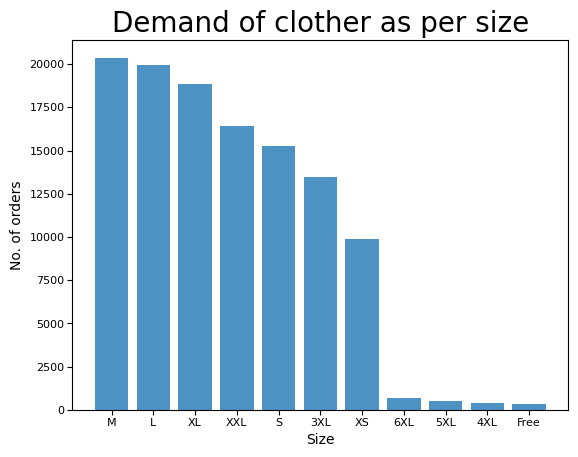

In [ ]:
#demand of colthes as per size
plt.bar(x=df.Size.value_counts().index,height=df.Size.value_counts(),alpha=0.8)
plt.xlabel("Size",fontdict={"size":10,"color":"k"})
plt.ylabel("No. of orders",fontdict={"size":10,"color":"k"})
plt.title("Demand of clother as per size",fontdict={"size":20,"color":"k"})
plt.tick_params(labelsize=8,pad=2)

#The demand for the Medium sized cloth is the highest followed by Large. The least favourable cloth size is  free style.

<Figure size 600x600 with 0 Axes>

<Axes: ylabel='Fulfilment'>

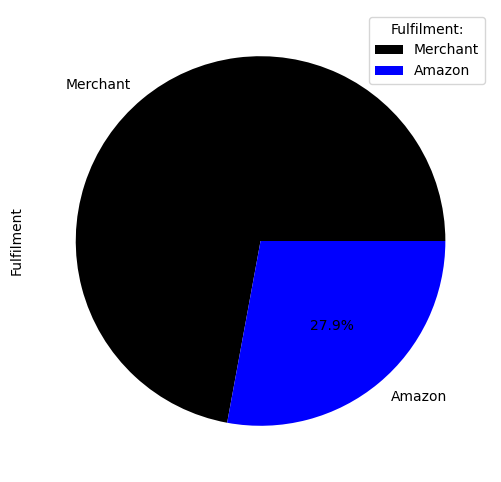

In [74]:
#to analyse the combination of merchant and amazon sales
plt.figure(1, figsize=(6,6))
df['Fulfilment'].value_counts().plot.pie(autopct="%1.1f%%",colors = ( "k", "b"),labels = df['Fulfilment'].unique(), shadow = False)
plt.legend(title = "Fulfilment:")
plt.show()

In [ ]:
#knowing the status
df['Status'].value_counts()

Shipped                          77711
Shipped - Delivered to Buyer     28761
Cancelled                         5631
Shipped - Returned to Seller      1950
Shipped - Picked Up                973
Pending                            656
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Courier Status', ylabel='count'>

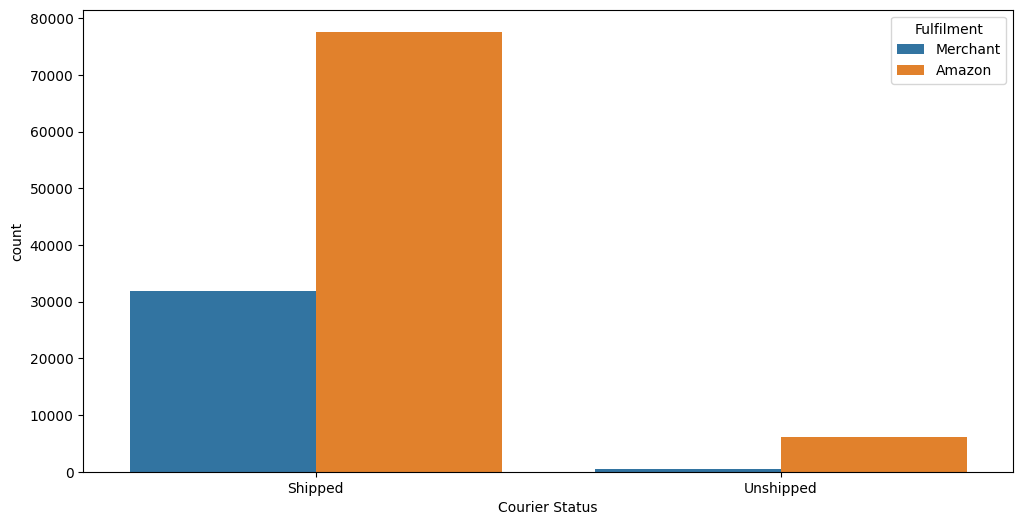

In [75]:
#to further analyse the revert of sale from merchant and amazon
plt.figure(figsize = (12, 6))

sns.countplot(x = 'Courier Status', hue = 'Fulfilment', data = df)

In [ ]:
#popular category
df['Category'].value_counts(sort=True, ascending=False)
#most popular category is set and second most popular is Kurta and the least popular cloth is Dupatta.

Set              45150
kurta            44814
Western Dress    13898
Top               9870
Ethnic Dress      1050
Blouse             841
Bottom             394
Saree              148
Dupatta              3
Name: Category, dtype: int64

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='Category', ylabel='Amount'>

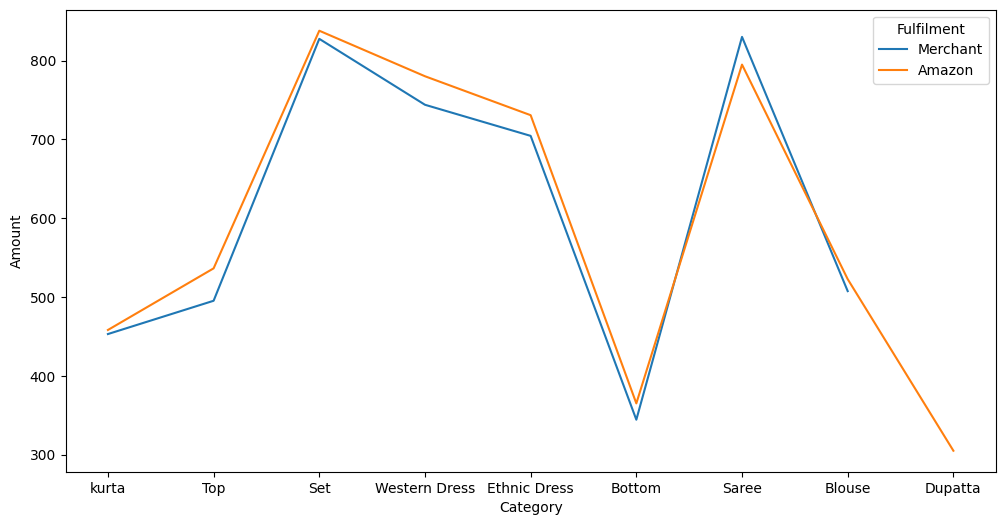

In [77]:

plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

sns.lineplot(x='Category', y='Amount', hue='Fulfilment', ci=None,
             estimator='mean', data=df)

plt.show()

In [ ]:

#to visualise the sales as per states
import time
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent="MyApp")

# Create empty lists to store latitude and longitude values
state_latitudes = []
state_longitudes = []

# Iterate through each state in the 'ship-state' column
for state in df['ship-state']:
    location = geolocator.geocode(state)

    if location:
        state_latitudes.append(location.latitude)
        state_longitudes.append(location.longitude)
    else:
        state_latitudes.append(None)
        state_longitudes.append(None)

    # Introduce a delay of 1 second between requests
    time.sleep(1)

# Add the latitude and longitude lists as new columns in the DataFrame
df['state_latitude'] = state_latitudes
df['state_longitude'] = state_longitudes

# Display the resulting DataFrame
print(df)


In [ ]:
#popular ship city
df['ship-city'].value_counts().head(10) #checking top 10 cities with largest amount of orders

#Bengaluru is the top city where there are largest orders. The second city is Hyderabad and the city with least order is Lucknow.

BENGALURU    10388
HYDERABAD     7302
MUMBAI        5641
NEW DELHI     5241
CHENNAI       4917
PUNE          3522
KOLKATA       2158
GURUGRAM      1729
THANE         1536
LUCKNOW       1279
Name: ship-city, dtype: int64

In [ ]:
#popular ship state
df['ship-state'].value_counts(sort=True, ascending=False).head(10) #checking top 10 states with largest amount of orders

#Maharashtra is the state with largest amound of order followed by Karnataka. The state with least order is Gujarat.

MAHARASHTRA       20273
KARNATAKA         15844
TAMIL NADU        10345
TELANGANA         10208
UTTAR PRADESH      9462
DELHI              6144
KERALA             5793
WEST BENGAL        5301
Andhra Pradesh     4795
Gujarat            4095
Name: ship-state, dtype: int64

In [ ]:
#spliiting the data to find the input to predict the status variable
X = df_ppd[[ 'Fulfilment_code', 'Sales Channel_code ',
       'ship-service-level_code', 'Style_code', 'Category_code', 'Size_code',
       'Courier Status_code', 'Qty_code', 'ship-city_code', 'ship-state_code',
       'B2B_code']]

In [ ]:
#predciting variable
y = df_ppd[["Status_code"]]

In [ ]:
#splitting the dataset to train and test
train_X, test_X, train_y, test_y = train_test_split(X, y,
					test_size = 0.3, random_state = 123)

In [ ]:
#overfitting underfitting
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,accuracy_score
# A function to model and also to calculate MAE using max_depth
def get_mae_max_depth (max_depth, train_X, val_X, train_y, val_y):
  # 3.0.1 Instantiate Decision tree regressor
    model = DecisionTreeRegressor(max_depth = max_depth )
    # 3.0.2 Train model
    model.fit(train_X, train_y)
    # 3.0.3 Make predictions
    preds_val = model.predict(val_X)
    # 3.0.4 Get error
    mae = mean_absolute_error(val_y, preds_val)
    # 3.0.5 Return error
    return(mae)

In [ ]:
# Compare MAE with differing values of max_dept:

for max_depth in [3,5,6,25]:
    my_mae = get_mae_max_depth (max_depth, train_X, test_X, train_y, test_y)
    print(f"Max dept: {max_depth} \t\t Mean Absolute Error: {my_mae}")
#overfitting can be seen in the case

Max dept: 3 		 Mean Absolute Error: 0.22207549797459467
Max dept: 5 		 Mean Absolute Error: 0.22030880225593472
Max dept: 6 		 Mean Absolute Error: 0.21999994674099813
Max dept: 25 		 Mean Absolute Error: 0.22318789574850442


In [ ]:
# descison tree
x1_names = X.columns
y1_labels = y['Status_code'].unique().astype(str); y1_labels

array(['5.0', '3.0', '0.0', '10.0', '9.0', '6.0', '7.0', '11.0', '8.0',
       '1.0', '2.0', '4.0', '12.0'], dtype='<U32')

In [ ]:
d1 = DecisionTreeClassifier(criterion = "entropy",max_depth = 5)
dtc_model1 = d1.fit(train_X,train_y)
dtc_model1

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
predict = d1.predict(test_X)
predict

array([3., 3., 0., ..., 3., 5., 3.])

In [ ]:
#analysing the accuracy of test dataframe
print(metrics.accuracy_score(test_y,predict))

0.9676697552999225


In [ ]:
#analysing the rule for decision tree2
dtc_model_rules1 = export_text(dtc_model1, feature_names = list(X)); print(dtc_model_rules1)

|--- Fulfilment_code <= 0.50
|   |--- Courier Status_code <= 0.50
|   |   |--- Size_code <= 9.50
|   |   |   |--- Style_code <= 1299.50
|   |   |   |   |--- ship-state_code <= 36.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- ship-state_code >  36.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- Style_code >  1299.50
|   |   |   |   |--- Style_code <= 1302.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- Style_code >  1302.50
|   |   |   |   |   |--- class: 3.0
|   |   |--- Size_code >  9.50
|   |   |   |--- ship-city_code <= 1780.50
|   |   |   |   |--- Category_code <= 6.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- Category_code >  6.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |--- ship-city_code >  1780.50
|   |   |   |   |--- ship-state_code <= 9.50
|   |   |   |   |   |--- class: 3.0
|   |   |   |   |--- ship-state_code >  9.50
|   |   |   |   |   |--- class: 3.0
|   |--- Courier Status_code >  0.50
|   |   |--- Sales Channel_co

In [ ]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': X.columns, 'importance': np.round(dtc_model1.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features
#fulfillment_code is the most important parameter

,feature,importance
0,Fulfilment_code,0.735
6,Courier Status_code,0.255
1,Sales Channel_code,0.007
9,ship-state_code,0.002
3,Style_code,0.001
2,ship-service-level_code,0.000
4,Category_code,0.000
5,Size_code,0.000
7,Qty_code,0.000
8,ship-city_code,0.000


In [ ]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict1 = dtc_model1.predict(train_X); dtc_model_predict1
# Decision Tree : Prediction (Testing Subset)
dtc_predict1 = dtc_model1.predict(test_X); dtc_predict1

array([3., 3., 5., ..., 5., 3., 3.])

array([3., 3., 0., ..., 3., 5., 3.])

In [ ]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat1 = pd.DataFrame(confusion_matrix(train_y, dtc_model_predict1)); dtc_model_conf_mat1

,0,1,2,3,4,5,6,7,8,9,10,11
0,3899,2,0,1,0,0,0,0,0,0,0,0
1,282,155,36,9,0,0,0,0,0,0,0,0
2,0,97,91,0,0,0,0,0,0,0,0,0
3,0,0,0,54467,0,0,0,0,0,0,0,0
4,0,0,0,0,20102,0,0,0,0,0,0,0
5,0,0,0,0,2,0,0,0,0,0,0,0
6,0,0,0,0,29,0,0,0,0,0,0,0
7,0,0,0,0,683,0,0,2,0,0,0,0
8,0,0,0,0,9,0,0,0,0,0,0,0
9,0,0,0,0,1354,0,0,0,0,0,0,0


In [ ]:
dtc_predict_perf1 = classification_report(train_y, dtc_model_predict1); print(dtc_predict_perf1)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      3902
         1.0       0.61      0.32      0.42       482
         2.0       0.72      0.48      0.58       188
         3.0       1.00      1.00      1.00     54467
         5.0       0.90      1.00      0.95     20102
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00        29
         8.0       1.00      0.00      0.01       685
         9.0       0.00      0.00      0.00         9
        10.0       0.00      0.00      0.00      1354
        11.0       0.00      0.00      0.00       109
        12.0       0.00      0.00      0.00         6

    accuracy                           0.97     81335
   macro avg       0.43      0.32      0.33     81335
weighted avg       0.95      0.97      0.95     81335



The overall accuracy of the model is 97%, indicating that it correctly predicts the class labels for a majority of instances.
While class 0 (0.0) has high precision (93%) and recall (100%), class 1 (1.0) has relatively lower precision (61%) and recall (32%), suggesting that the model struggles with identifying this class.
Classes 2 (2.0), 5 (5.0), and 8 (8.0) have decent precision and recall scores, with class 5 achieving high precision and recall (90% and 100%).
Classes 6 (6.0), 7 (7.0), 9 (9.0), 10 (10.0), 11 (11.0), and 12 (12.0) have very low or zero precision and recall, indicating that the model's predictions for these classes are unreliable.
The macro average of precision and recall is 0.43 and 0.32, respectively, indicating that the model's performance is skewed due to imbalanced classes. The weighted average of precision and recall is better, suggesting that the model performs well on dominant classes.

In [ ]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(test_y, dtc_predict1)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(test_y, dtc_predict1); print(dtc_predict_perf)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1724,5,0,0,0,0,0,0,0,0,0,0,0
1,117,41,15,1,0,0,0,0,0,0,0,0,0
2,0,53,40,0,0,0,0,0,0,0,0,0,0
3,0,0,0,23270,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,8657,0,0,2,0,0,0,0
6,0,0,0,0,0,3,0,0,0,0,0,0,0
7,0,0,0,0,0,6,0,0,0,0,0,0,0
8,0,0,0,0,0,288,0,0,0,0,0,0,0
9,0,0,0,0,0,2,0,0,0,0,0,0,0


              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1729
         1.0       0.41      0.24      0.30       174
         2.0       0.73      0.43      0.54        93
         3.0       1.00      1.00      1.00     23270
         4.0       0.00      0.00      0.00         1
         5.0       0.90      1.00      0.95      8659
         6.0       0.00      0.00      0.00         3
         7.0       0.00      0.00      0.00         6
         8.0       0.00      0.00      0.00       288
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00       596
        11.0       0.00      0.00      0.00        36
        12.0       0.00      0.00      0.00         2

    accuracy                           0.97     34859
   macro avg       0.31      0.28      0.29     34859
weighted avg       0.94      0.97      0.95     34859



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The overall accuracy of the model on the testing dataset is 97%, indicating that it correctly predicts the class labels for a majority of instances.
Class 0 (0.0) has high precision (94%) and recall (100%), indicating that the model is very accurate in identifying this class.
Class 3 (3.0) has perfect precision, recall, and F1-score (all 1.00), which suggests the model performs exceptionally well for this class.
Class 5 (5.0) also has high precision and recall (90% and 100%), indicating good performance.
Most other classes, such as 1, 2, 6, 7, 8, 9, 10, 11, and 12, have low precision, recall, and F1-scores, indicating that the model's predictions for these classes are not accurate. The macro and weighted averages are relatively low due to these imbalances.

<Figure size 2500x2500 with 0 Axes>

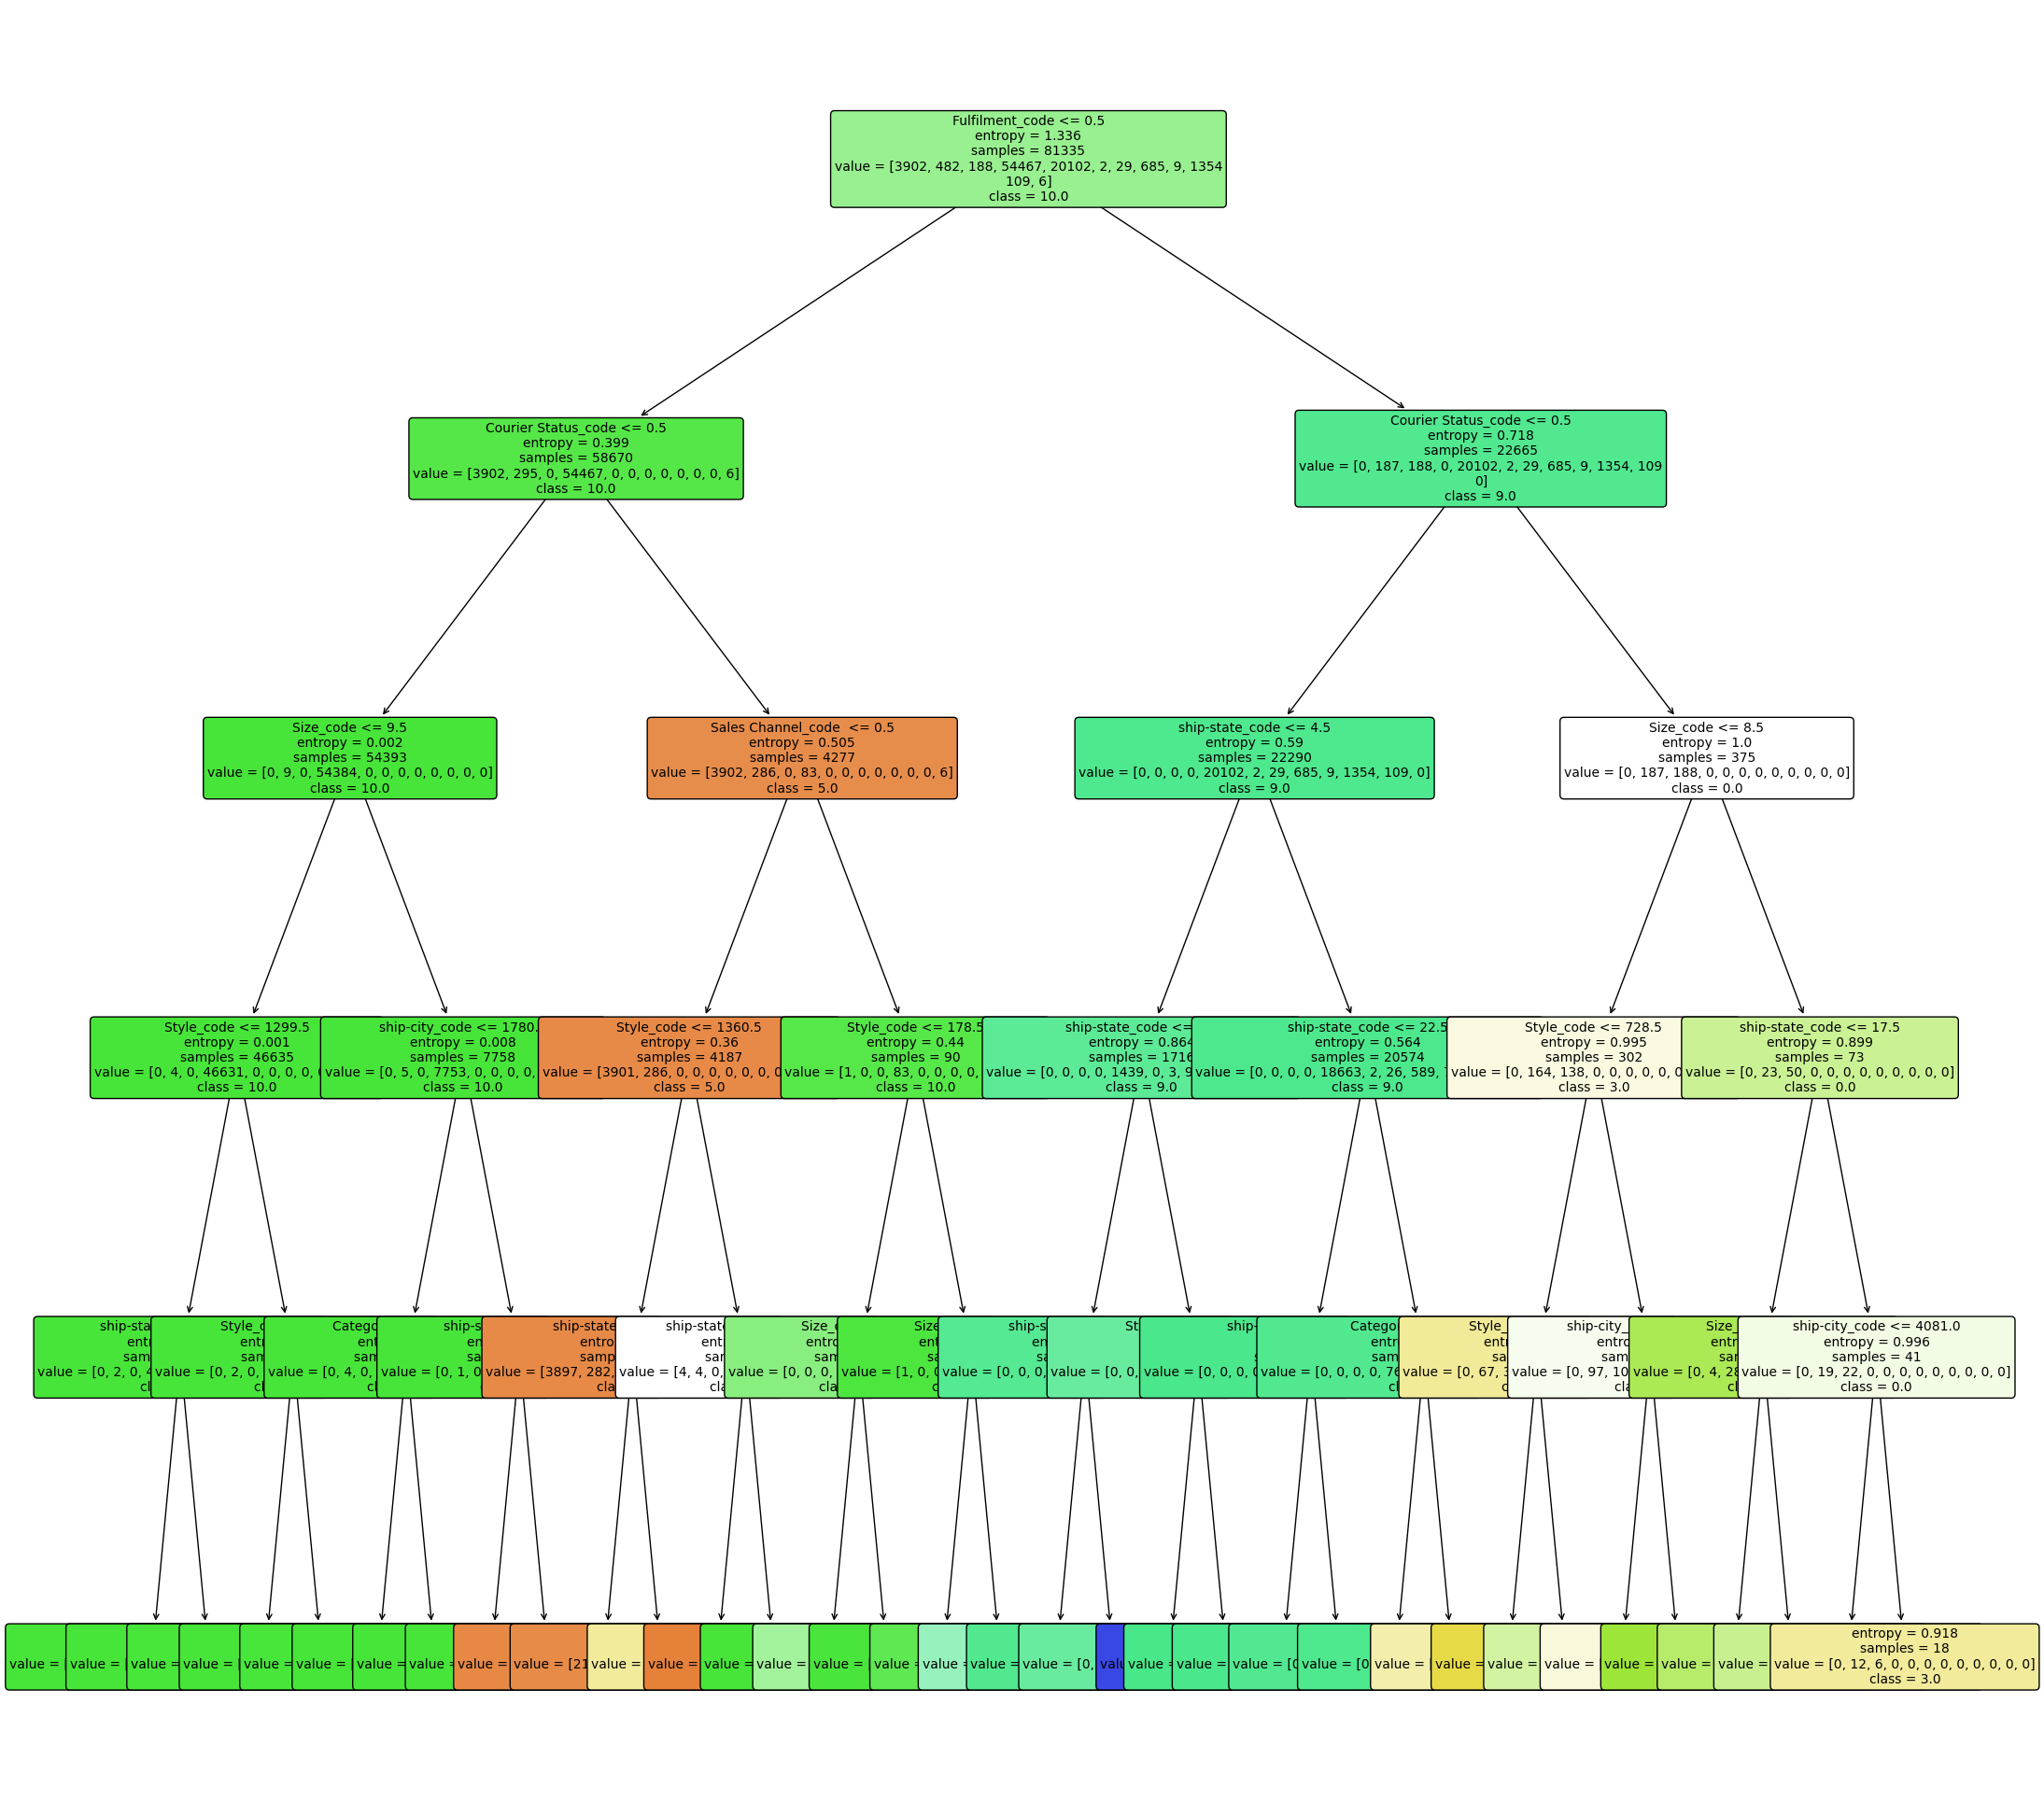

In [ ]:
# Decision Tree : Plot [Training Subset]
plt.figure(figsize = (25,25))
train_subset_dtc_plot1 = plot_tree(dtc_model1, feature_names=X.columns, class_names= y1_labels, rounded=True, filled=True, fontsize=10)
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(test_y,dtc_predict1))
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,dtc_predict1)

0.9676697552999225


array([[ 1724,     5,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [  117,    41,    15,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,    53,    40,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0, 23270,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,  8657,     0,     0,     2,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     3,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     6,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   288,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,

<Axes: >

Text(0.5, 23.52222222222222, 'Predicted Label')

Text(50.722222222222214, 0.5, 'True Label')

Text(0.5, 1.0, 'Decision Tree : Confusion Matrix')

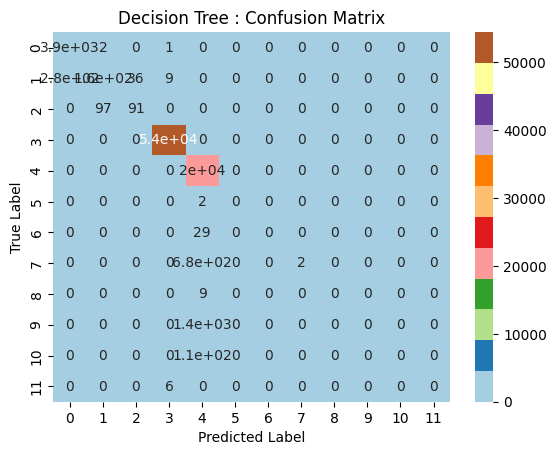

In [ ]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_model_conf_mat1, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()

In [ ]:
#Hyperparamter tunning

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)

logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-pack

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.6690276606866015


In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
								random_state=0)

# fit the regressor with x and y data
regressor.fit(X, y)

<ipython-input-58-f6e9a1b5d16a>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


RandomForestRegressor(random_state=0)

In [ ]:
#xgboost
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
				n_estimators = 10, seed = 123)

# Fitting the model
xgb_r.fit(train_X, train_y)

# Predict the model
pred = xgb_r.predict(test_X)

# RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[15:42:22] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

RMSE :  0.711599


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
model = tree.DecisionTreeRegressor()

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
X = df_ppd[['Fulfilment_code','Sales Channel_code ','Size_code']]
y = df_ppd['Courier Status_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35035)
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)
model.score(X_test,y_test)

DecisionTreeRegressor()

0.028728899803391994

In [ ]:
model.predict([[1,0,8], [0,1,5]])

array([0.01797088, 1.        ])

# Observation

1. Index, Order ID, ASIN, ship-country, ship-postal-code, and promotion-ids: Since they are irrelevant for our investigation, a few data columns from the dataset, including 22, currencies, were eliminated.
2. We determined that approximately 10% of the data were not useful to us, which helped us reduce the size of our dataset.
3. “Fulfillment code”, “Sales channel code”, “ship service level code” etc are some of the important features.
4. The test size is 0.3 which means that remaining 0.7 data is trained.
5. The XGBRegressor model with the given hyperparameters and settings achieved a Root Mean Square Error (RMSE) of approximately 0.7116, indicating the average magnitude of prediction errors in the regression task. Lower RMSE values suggest better model performance in minimizing prediction errors.
6. The provided result indicates that after hyperparameter tuning, the Logistic Regression model achieved its highest performance (score of approximately 0.669) with a specific regularization parameter (C) value of 1e-05. This suggests a balance between fitting the data and preventing overfitting, leading to improved predictive capabilities.
7. As the max_depth parameter grows, overfitting in this method can be determined by comparing the MAE values between training and testing data. It indicates that the model is overfitting to the training data and may not generalize well to new data if there is a large variation in MAE values or if the testing MAE starts to rise after a certain point. The MAE for maximum depth of 25 has increased after maximum depth of 5.Hence, max depth of 5 can be considered while making decision tree.
8. The accuracy rating is roughly 0.9677, or 96.77%, of the total. The predicted labels from the model match the actual labels from the test data in about 96.77% of the cases.
9. The classification report evaluates the performance of a model on a multi-class classification task. It shows metrics such as precision, recall, and F1-score for each class, along with overall accuracy. The "UndefinedMetricWarning" indicates that some classes have no predicted samples, potentially leading to undefined metrics like precision and F1-score.
10. The classification report presents evaluation metrics for a model's predictions on test data. It includes precision, recall, F1-score, and other measures for each class, highlighting the model's performance across different classes. The "macro avg" and "weighted avg" provide overall insights into the model's accuracy and effectiveness in classifying the data.
11. The given result, around 0.0145, signifies the proportion of variance explained by the trained Decision Tree Regressor model on the test data. A higher value indicates a better fit, but here, the model's explanatory power appears limited.
12. The most demanded size of clothing is in Medium whereas the second most demanded is Large. The least demanded is 4XL
13. Bengaluru and Hyderabad has the most demand
14. Maharasthra and Karnataka has the most demand.
15. Set and Kurta are the most used clothing item


# Managerial implication

1. The processing has improved data qualityand has made data better, leading to analyses that are more accurate and trustworthy.
2. The data_ppd can further be used by manager to analyse and predict the function in future
3. The Decision Tree Regression has improved decision-making across industries by helping managers estimate demand, optimize pricing, and allocate resources effectively.
4. The Managers may assess risks, evaluate performance, and customize strategies for marketing, supply chain, and personnel management by using Decision Tree Regression.
5. With Decision Tree Regression promotes efficient strategic planning and better results by enabling data-driven decisions, from investment decisions to sustainability efforts.
6. A confusion matrix has administrative implications for evaluating and enhancing classification model accuracy and efficacy, which supports decisions about resource allocation and strategy improvement.
7. By guiding resource allocation and strategic decision-making for precise and trustworthy predictions, managers can enhance model performance by having a clear understanding of overfitting and underfitting in coding.
8. Since the category's column indicates that the majority of customers choose to purchase tops, managers must concentrate on increasing the quantity, quality, and accessibility of these products.
9. Since more people purchase sizes like 3XL, XS, 6XL, M, 4XL, and 5XL, managers should concentrate on maintaining a greater inventory for these sizes rather than a higher SKU for other widely accessible sizes.
10. It was found that, with few exclusions such blouses and western dresses, an average of 4 pieces are sold for a category. Similar to this, 4 pieces on average per size are sold, with some outliers in the XXL range. K mean was used to assist us find all of these outliers.
11. Effective resource planning can also mean improved supply chain management and more seamless decision-making.
12. The size and category, together with the similarities discovered in these clusters, can aid in product segmentation.
13. Cities—namely Bengaluru and Lucknow—sold the most and the least clothing, as well as which states—Maharashtra and Gujarat—sold the least. The most popular item sold is the set, while the least popular item sold is the dupatta.

